In [1]:
from tensorflow.keras import  models
model = models.load_model('cnn_mitbih.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 601, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 597, 16)           96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 593, 16)           1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 296, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 296, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 294, 32)           1568      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 292, 32)           3104  

In [3]:
# Convert the model to the TensorFlow Lite format without quantization
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("ECG2.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("ECG2.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\SOUMYA\AppData\Local\Temp\tmpnz_3mkvu\assets


INFO:tensorflow:Assets written to: C:\Users\SOUMYA\AppData\Local\Temp\tmpnz_3mkvu\assets


Model is 1030940 bytes


In [2]:
!echo "const unsigned char model[] = {" > model.h
!cat ECG.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")


'xxd' is not recognized as an internal or external command,
operable program or batch file.


Header file, model.h, is 72 bytes.


In [5]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="ECG.tflite")
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
print(input_details)

# output details
print(output_details)

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 601,   1]), 'shape_signature': array([ -1, 601,   1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 74, 'shape': array([1, 2]), 'shape_signature': array([-1,  2]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [1]:
u = [-1,  2,  3, -2,  0,  1,  2]
v = [ 2,  4, -1,  1]

In [5]:
import numpy as np
np.convolve(u,v,'same')

array([ 0, 15,  5, -9,  7,  6,  7])

In [14]:
signal4 = [0.00000,0.00000,0.00000,0.00001,0.00005,0.00022,0.00074,0.00212,0.00536,0.01205,0.02446,0.04536,0.07752,0.12298,0.18215,0.25301,0.33071,0.40763,0.47425,0.52051,0.53755,0.51943,0.46447,0.37586,0.26129,0.13180,-0.00017,-0.12298,-0.22789,-0.31051,-0.37142,-0.41563,-0.45114,-0.48692,-0.53062,-0.58669,-0.65525,-0.73195,-0.80888,-0.87622,-0.92435,-0.94585,-0.93696,-0.89832,-0.83467,-0.75378,-0.66484,-0.57655,-0.49554,-0.42522,-0.36539,-0.31264,-0.26129,-0.20483,-0.13739,-0.05500,0.04353,0.15648,0.27949,0.40643,0.53042,0.64494,0.74466,0.82589,0.88664,0.92632,0.94514,0.94358,0.92188,0.87987,0.81703,0.73298,0.62803,0.50385,0.36392,0.21372,0.06043,-0.08775,-0.22272,-0.33761,-0.42790,-0.49214,-0.53212,-0.55250,-0.55985,-0.56143,-0.56390,-0.57218,-0.58884,-0.61384,-0.64487,-0.67801,-0.70853,-0.73177,-0.74372,-0.74147,-0.72335,-0.68880,-0.63816,-0.57246,-0.49317,-0.40209,-0.30131,-0.19327,-0.08076,0.03311,0.14497,0.25149,0.34963,0.43698,0.51205,0.57442,0.62477,0.66474,0.69658,0.72281,0.74579,0.76732,0.78837,0.80896,0.82815,0.84422,0.85500,0.85819,0.85180,0.83444,0.80549,0.76512,0.71416,0.65380,0.58533,0.50988,0.42831,0.34123,0.24921,0.15293,0.05346,-0.04759,-0.14806,-0.24526,-0.33619,-0.41774,-0.48701,-0.54163,-0.58003,-0.60175,-0.60752,-0.59931,-0.58006,-0.55334,-0.52271,-0.49119,-0.46076,-0.43204,-0.40442,-0.37633,-0.34590,-0.31161,-0.27296,-0.23080,-0.18737,-0.14595,-0.11020,-0.08340,-0.06766,-0.06340,-0.06916,-0.08179,-0.09703,-0.11030,-0.11756,-0.11604,-0.10468,-0.08421,-0.05687,-0.02581,0.00560,0.03453,0.05916,0.07904,0.09502,0.10907,0.12375,0.14176,0.16537,0.19612,0.23455,0.28024,0.33195,0.38795,0.44640,0.50566,0.56463,0.62280,0.68021,0.73712,0.79369,0.84949,0.90313,0.95208,0.99268,1.02033,1.03002,1.01679,0.97635,0.90567,0.80340,0.67030,0.50946,0.32639,0.12890,-0.07337,-0.26963,-0.44907,-0.60196,-0.72100,-0.80224,-0.84570,-0.85533,-0.83835,-0.80403,-0.76215,-0.72138,-0.68798,-0.66496,-0.65195,-0.64570,-0.64113,-0.63260,-0.61521,-0.58569,-0.54296,-0.48799,-0.42339,-0.35252,-0.27880,-0.20493,-0.13258,-0.06231,0.00629,0.07420,0.14261,0.21255,0.28463,0.35891,0.43485,0.51143,0.58722,0.66065,0.73010,0.79404,0.85101,0.89949,0.93772,0.96350,0.97414,0.96666,0.93817,0.88646,0.81068,0.71185,0.59313,0.45970,0.31825,0.17617,0.04063,-0.08225,-0.18811,-0.27459,-0.34136,-0.38976,-0.42233,-0.44215,-0.45230,-0.45540,-0.45332,-0.44708,-0.43692,-0.42245,-0.40290,-0.37734,-0.34488,-0.30481,-0.25661,-0.20005,-0.13516,-0.06229,0.01783,0.10401,0.19452,0.28702,0.37859,0.46579,0.54484,0.61186,0.66319,0.69579,0.70756,0.69771,0.66700,0.61773,0.55357,0.47922,0.39976,0.32002,0.24397,0.17424,0.11190,0.05651,0.00648,-0.04046,-0.08662,-0.13383,-0.18300,-0.23391,-0.28521,-0.33462,-0.37932,-0.41634,-0.44308,-0.45765,-0.45912,-0.44768,-0.42449,-0.39146,-0.35090,-0.30513,-0.25613,-0.20530,-0.15337,-0.10042,-0.04610,0.01015,0.06883,0.13011,0.19369,0.25871,0.32379,0.38714,0.44674,0.50056,0.54675,0.58382,0.61071,0.62685,0.63208,0.62657,0.61070,0.58497,0.54995,0.50622,0.45447,0.39550,0.33034,0.26029,0.18695,0.11217,0.03799,-0.03349,-0.10029,-0.16066,-0.21319,-0.25696,-0.29152,-0.31689,-0.33346,-0.34191,-0.34309,-0.33789,-0.32718,-0.31176,-0.29228,-0.26928,-0.24317,-0.21420,-0.18250,-0.14809,-0.11091,-0.07082,-0.02761,0.01901,0.06943,0.12418,0.18380,0.24871,0.31890,0.39365,0.47115,0.54844,0.62142,0.68530,0.73517,0.76685,0.77750,0.76619,0.73397,0.68355,0.61871,0.54348,0.46139,0.37496,0.28564,0.19393,0.09997,0.00407,-0.09276,-0.18866,-0.28093,-0.36645,-0.44228,-0.50616,-0.55701,-0.59502,-0.62153,-0.63853,-0.64811,-0.65182,-0.65029,-0.64304,-0.62864,-0.60519,-0.57088,-0.52448,-0.46584,-0.39593,-0.31677,-0.23102,-0.14152,-0.05085,0.03905,0.12703,0.21275,0.29641,0.37854,0.45957,0.53955,0.61781,0.69287,0.76239,0.82329,0.87207,0.90511,0.91909,0.91126,0.87975,0.82364,0.74296,0.63868,0.51266,0.36766,0.20741,0.03667,-0.13880,-0.31241,-0.47715,-0.62622,-0.75375,-0.85554,-0.92963,-0.97646,-0.99882,-1.00126,-0.98932,-0.96863,-0.94400,-0.91879,-0.89459,-0.87118,-0.84692,-0.81937,-0.78594,-0.74455,-0.69409,-0.63460,-0.56715,-0.49351,-0.41566,-0.33534,-0.25372,-0.17132,-0.08814,-0.00399,0.08107,0.16638,0.25036,0.33053,0.40360,0.46598,0.51420,0.54557,0.55861,0.55342,0.53167,0.49639,0.45149,0.40109,0.34892,0.29780,0.24942,0.20434,0.16236,0.12292,0.08554,0.05018,0.01734,-0.01205,-0.03692,-0.05639,-0.07015,-0.07861,-0.08295,-0.08491,-0.08653,-0.08971,-0.09593,-0.10590,-0.11947,-0.13566,-0.15275,-0.16860,-0.18095,-0.18775,-0.18750,-0.17944,-0.16371,-0.14130,-0.11398,-0.08411,-0.05429,-0.02708,-0.00462,0.01170,0.02143,0.02520,0.02458,0.02179,0.01920,0.01882,0.02177,0.02788,0.03566,0.04247,0.04496,0.03978,0.02419,-0.00330,-0.04262,-0.09210,-0.14873,-0.20864,-0.26773,-0.32224,-0.36927,-0.40704,-0.43495,-0.45346,-0.46369,-0.46711,-0.46516,-0.45892,-0.44902,-0.43561,-0.41851,-0.39732,-0.37165,-0.34118,-0.30575,-0.26533,-0.22000,-0.17001,-0.11587,-0.05850,0.00053,0.05886,0.11334,0.16021,0.19555,0.21589,0.21893,0.20416,0.17325,0.13003,0.08015,0.03022,-0.01315,-0.04445,-0.06009,-0.05895,-0.04245,-0.01409,0.02120,0.05810,0.09177,0.11865,0.13691,0.14654,0.14917,0.14746,0.14458,0.14344,0.14619,0.15382,0.16606,0.18137,0.19730,0.21080,0.21873,0.21827,0.20735,0.18495,0.15124,0.10764,0.05664,0.00154,-0.05397,-0.10628,-0.15231,-0.18992,-0.21827,-0.23787,-0.25056,-0.25923,-0.26739,-0.27854,-0.29561,-0.32038,-0.35312,-0.39242,-0.43539,-0.47808,-0.51615,-0.54554,-0.56325,-0.56774,-0.55918,-0.53941,-0.51150,-0.47920,-0.44631,-0.41604,-0.39056,-0.37074,-0.35612,-0.34517,-0.33559,-0.32480,-0.31034,-0.29022,-0.26307,-0.22820,-0.18547,-0.13506,-0.07731,-0.01251,0.05911,0.13726,0.22143,0.31054,0.40265,0.49480,0.58297,0.66231,0.72754,0.77363,0.79646,0.79350,0.76423,0.71036,0.63559,0.54511,0.44482,0.34046,0.23681,0.13714,0.04301,-0.04557,-0.12963,-0.21056,-0.28949,-0.36677,-0.44172,-0.51275,-0.57762,-0.63401,-0.67993,-0.71422,-0.73670,-0.74828,-0.75072,-0.74641,-0.73792,-0.72771,-0.71777,-0.70948,-0.70353,-0.69990,-0.69800,-0.69670,-0.69441,-0.68907,-0.67824,-0.65908,-0.62858,-0.58380,-0.52231,-0.44267,-0.34480,-0.23035,-0.10265,0.03352,0.17247,0.30829,0.43554,0.54990,0.64845,0.72982,0.79395,0.84170,0.87439,0.89337,0.89974,0.89420,0.87712,0.84876,0.80944,0.75982,0.70098,0.63439,0.56174,0.48478,0.40500,0.32350,0.24086,0.15719,0.07226,-0.01425,-0.10257,-0.19263,-0.28389,-0.37532,-0.46537,-0.55209,-0.63316,-0.70610,-0.76834,-0.81750,-0.85149,-0.86883,-0.86879,-0.85161,-0.81860,-0.77214,-0.71554,-0.65278,-0.58806,-0.52535,-0.46781,-0.41740,-0.37457,-0.33825,-0.30614,-0.27520,-0.24232,-0.20503,-0.16200,-0.11336,-0.06063,-0.00632,0.04658,0.09529,0.13777,0.17308,0.20137,0.22370,0.24161,0.25662,0.26981,0.28158,0.29151,0.29858,0.30142,0.29871,0.28949,0.27347,0.25111,0.22357,0.19253,0.15997,0.12788,0.09805,0.07198,0.05078,0.03530,0.02615,0.02382,0.02861,0.04058,0.05928,0.08351,0.11105,0.13854,0.16155,0.17500,0.17375,0.15352,0.11176,0.04846,-0.03345,-0.12815,-0.22764,-0.32284,-0.40512,-0.46776,-0.50714,-0.52333,-0.51992,-0.50317,-0.48057,-0.45927,-0.44463,-0.43925,-0.44272,-0.45200,-0.46239,-0.46875,-0.46678,-0.45386,-0.42959,-0.39568,-0.35545,-0.31307,-0.27267,-0.23759,-0.20989,-0.19012,-0.17743,-0.16982,-0.16460,-0.15879,-0.14944,-0.13389,-0.10988,-0.07560,-0.02969,0.02870,0.09978,0.18291,0.27637,0.37719,0.48102,0.58235,0.67480,0.75177,0.80708,0.83574,0.83448,0.80221,0.74007,0.65130,0.54084,0.41475,0.27960,0.14188,0.00752,-0.11849,-0.23224,-0.33099,-0.41312,-0.47803,-0.52604,-0.55830,-0.57661,-0.58333,-0.58114,-0.57276,-0.56066,-0.54679,-0.53227,-0.51731,-0.50128,-0.48283,-0.46026,-0.43193,-0.39662,-0.35383,-0.30393,-0.24809,-0.18810,-0.12590,-0.06322,-0.00110,0.06037,0.12211,0.18588,0.25385,0.32796,0.40931,0.49761,0.59085,0.68532,0.77593,0.85684,0.92220,0.96692,0.98730,0.98146,0.94951,0.89347,0.81697,0.72484,0.62257,0.51580,0.40975,0.30874,0.21585,0.13276,0.05972,-0.00413,-0.06041,-0.11091,-0.15706,-0.19954,-0.23805,-0.27129,-0.29729,-0.31384,-0.31906,-0.31198,-0.29289,-0.26355,-0.22705,-0.18740,-0.14891,-0.11551,-0.09011,-0.07424,-0.06790,-0.06985,-0.07798,-0.08995,-0.10361,-0.11731,-0.12996,-0.14088,-0.14951,-0.15516,-0.15696,-0.15392,-0.14526,-0.13078,-0.11123,-0.08845,-0.06526,-0.04515,-0.03163,-0.02764,-0.03496,-0.05382,-0.08283,-0.11916,-0.15895,-0.19797,-0.23220,-0.25844,-0.27462,-0.28006,-0.27539,-0.26238,-0.24359,-0.22201,-0.20072,-0.18246,-0.16931,-0.16245,-0.16191,-0.16652,-0.17401,-0.18131,-0.18499,-0.18188,-0.16957,-0.14685,-0.11393,-0.07227,-0.02426,0.02731,0.07984,0.13136,0.18084,0.22818,0.27402,0.31942,0.36547,0.41298,0.46228,0.51323,0.56532,0.61793,0.67057,0.72302,0.77528,0.82734,0.87863,0.92746,0.97041,1.00205,1.01509,1.00117,0.95216,0.86188,0.72782,0.55253,0.34414,0.11597,-0.11508,-0.33088,-0.51491,-0.65492,-0.74488,-0.78589,-0.78565,-0.75681,-0.71449,-0.67338,-0.64516,-0.63667,-0.64912,-0.67850,-0.71695,-0.75476,-0.78257,-0.79316,-0.78267,-0.75096,-0.70111,-0.63837,-0.56875,-0.49765,-0.42887,-0.36405,-0.30271,-0.24278,-0.18138,-0.11572,-0.04384,0.03486,0.11954,0.20811,0.29775,0.38554,0.46907,0.54704,0.61951,0.68795,0.75506,0.82432,0.89930,0.98297,1.07691,1.18057,1.29075,1.40140,1.50379,1.58713,1.63970,1.65026,1.60957,1.51187,1.35590,1.14548,0.88937,0.60054,0.29489,-0.01035,-0.29844,-0.55479,-0.76836,-0.93272,-1.04634,-1.11251,-1.13843,-1.13397,-1.11008,-1.07712,-1.04346,-1.01446,-0.99210,-0.97519,-0.96020,-0.94231,-0.91667,-0.87943,-0.82849,-0.76373,-0.68687,-0.60095,-0.50960,-0.41619,-0.32319,-0.23160,-0.14080,-0.04868,0.04797,0.15275,0.26885,0.39833,0.54143,0.69620,0.85844,1.02189,1.17878,1.32052,1.43851,1.52507,1.57420,1.58228,1.54849,1.47491,1.36627,1.22939,1.07235,0.90353,0.73068,0.56022,0.39684,0.24341,0.10121,-0.02960,-0.14950,-0.25917,-0.35910,-0.44950,-0.53023,-0.60095,-0.66119,-0.71052,-0.74857,-0.77514,-0.79011,-0.79337,-0.78485,-0.76439,-0.73179,-0.68685,-0.62946,-0.55966,-0.47775,-0.38434,-0.28032,-0.16687,-0.04542,0.08238,0.21465,0.34924,0.48362,0.61484,0.73945,0.85348,0.95265,1.03257,1.08917,1.11914,1.12043,1.09262,1.03706,0.95682,0.85623,0.74035,0.61420,0.48216,0.34757,0.21264,0.07879,-0.05289,-0.18099,-0.30334,-0.41686,-0.51779,-0.60224,-0.66701,-0.71024,-0.73197,-0.73419,-0.72047,-0.69533,-0.66324,-0.62784,-0.59129,-0.55400,-0.51483,-0.47153,-0.42148,-0.36244,-0.29312,-0.21357,-0.12529,-0.03107,0.06535,0.15965,0.24739,0.32429,0.38655,0.43093,0.45494,0.45692,0.43619,0.39324,0.32997,0.24974,0.15735,0.05872,-0.03974,-0.13194,-0.21291,-0.27959,-0.33124,-0.36932,-0.39708,-0.41865,-0.43804,-0.45825,-0.48061,-0.50463,-0.52816,-0.54808,-0.56105,-0.56431,-0.55633,-0.53712,-0.50819,-0.47222,-0.43249,-0.39222,-0.35397,-0.31923,-0.28827,-0.26017,-0.23310,-0.20468,-0.17227,-0.13328,-0.08526,-0.02597,0.04656,0.13399,0.23730,0.35639,0.48943,0.63237,0.77858]

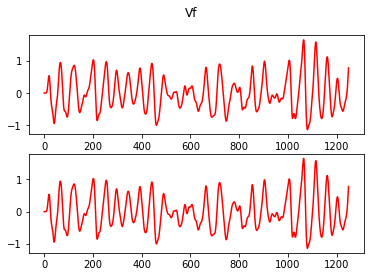

In [15]:
import matplotlib.pyplot as plt
Vf = [0.505,0.55,0.51,0.53,0.49,0.455,0.4,0.36,0.28,0.165,0.045,-0.04,-0.13,-0.155,-0.19,-0.22,-0.27,-0.375,-0.495,-0.64,-0.77,-0.86,-0.97,-0.98,-1.025,-1.055,-1.065,-1.055,-1.035,-1.01,-0.96,-0.915,-0.87,-0.855,-0.82,-0.765,-0.715,-0.655,-0.59,-0.515,-0.395,-0.26,-0.14,-0.015,0.11,0.2,0.305,0.415,0.525,0.63,0.715,0.75,0.785,0.79,0.755,0.715,0.63,0.525,0.4,0.245,0.075,-0.09,-0.255,-0.33,-0.38,-0.435,-0.465,-0.505,-0.575,-0.66,-0.695,-0.755,-0.76,-0.805,-0.83,-0.865,-0.9,-0.97,-1.005,-1.045,-1.055,-1.07,-1.035,-1.005,-0.93,-0.865,-0.78,-0.69,-0.58,-0.48,-0.345,-0.225,-0.135,-0.04,0.035,0.12,0.17,0.245,0.315,0.365,0.415,0.475,0.505,0.54,0.59,0.65,0.7,0.725,0.755,0.745,0.74,0.685,0.69,0.66,0.645,0.61,0.575,0.485,0.38,0.275,0.165,0.06,-0.03,-0.105,-0.19,-0.285,-0.4,-0.5,-0.585,-0.61,-0.645,-0.625,-0.57,-0.555,-0.585,-0.605,-0.64,-0.65,-0.63,-0.6,-0.55,-0.505,-0.455,-0.375,-0.37,-0.33,-0.305,-0.31,-0.32,-0.305,-0.315,-0.31,-0.335,-0.355,-0.35,-0.33,-0.305,-0.265,-0.28,-0.245,-0.255,-0.24,-0.215,-0.185,-0.16,-0.15,-0.115,-0.1,-0.09,-0.08,-0.01,0.055,0.115,0.155,0.21,0.28,0.35,0.425,0.475,0.53,0.625,0.69,0.83,0.925,1.045,1.065,1.1,1.11,1.11,1.095,1.085,1.01,0.855,0.67,0.5,0.255,0.005,-0.22,-0.36,-0.46,-0.505,-0.55,-0.585,-0.6,-0.675,-0.67,-0.705,-0.685,-0.73,-0.735,-0.725,-0.74,-0.725,-0.7,-0.68,-0.635,-0.605,-0.585,-0.565,-0.53,-0.49,-0.395,-0.3,-0.22,-0.13,-0.07,-0.015,0.025,0.07,0.16,0.29,0.435,0.525,0.61,0.65,0.71,0.765,0.85,0.95,1.045,1.125,1.16,1.125,0.99,0.895,0.76,0.65,0.585,0.505,0.395,0.285,0.155,0.015,-0.07,-0.16,-0.185,-0.23,-0.255,-0.26,-0.28,-0.32,-0.335,-0.355,-0.345,-0.32,-0.29,-0.26,-0.25,-0.21,-0.175,-0.11,-0.035,0.07,0.165,0.27,0.37,0.48,0.545,0.655,0.72,0.82,0.86,0.87,0.855,0.82,0.785,0.685,0.62,0.605,0.58,0.55,0.475,0.41,0.325,0.28,0.26,0.185,0.11,0.05,0.02,-0.05,-0.105,-0.165,-0.215,-0.265,-0.275,-0.26,-0.23,-0.215,-0.205,-0.21,-0.175,-0.14,-0.11,-0.04,0.01,0.08,0.125,0.175,0.25,0.31,0.39,0.485,0.54,0.61,0.675,0.75,0.77,0.81,0.835,0.87,0.885,0.895,0.88,0.855,0.81,0.775,0.725,0.675,0.595,0.54,0.445,0.405,0.315,0.26,0.195,0.145,0.08,0.055,0.035,-0.01,0.005,-0.03,-0.055,-0.045,-0.02,0.0,0.015,0.015,0.055,0.05,0.075,0.12,0.165,0.235,0.27,0.325,0.34,0.385,0.455,0.55,0.685,0.805,0.915,1.035,1.09,1.125,1.1,1.085,1.07,1.09,1.075,1.08,1.06,1.01,0.93,0.795,0.685,0.56,0.455,0.355,0.275,0.215,0.145,0.065,-0.005,-0.07,-0.13,-0.17,-0.215,-0.26,-0.305,-0.33,-0.345,-0.34,-0.285,-0.25,-0.195,-0.15,-0.105,-0.05,-0.01,0.08,0.16,0.265,0.38,0.475,0.555,0.635,0.715,0.79,0.905,1.035,1.135,1.245,1.295,1.325,1.325,1.345,1.33,1.315,1.255,1.18,1.07,0.925,0.745,0.57,0.325,0.105,-0.03,-0.145,-0.21,-0.295,-0.375,-0.48,-0.54,-0.57,-0.6,-0.63,-0.62,-0.62,-0.635,-0.64,-0.64,-0.645,-0.62,-0.55,-0.51,-0.46,-0.43,-0.385,-0.335,-0.265,-0.23,-0.135,-0.025,0.08,0.195,0.285,0.37,0.42,0.505,0.585,0.66,0.705,0.695,0.68,0.64,0.625,0.595,0.585,0.595,0.575,0.55,0.465,0.385,0.315,0.285,0.28,0.245,0.255,0.24,0.24,0.205,0.175,0.165,0.175,0.155,0.15,0.14,0.11,0.11,0.095,0.06,0.02,0.0,0.005,0.02,0.04,0.06,0.08,0.09,0.11,0.145,0.18,0.205,0.205,0.195,0.18,0.145,0.15,0.17,0.23,0.26,0.275,0.295,0.28,0.245,0.235,0.19,0.16,0.115,0.075,0.005,-0.025,-0.095,-0.155,-0.195,-0.255,-0.305,-0.305,-0.33,-0.335,-0.37,-0.395,-0.4,-0.37,-0.375,-0.345,-0.315,-0.32,-0.285,-0.285,-0.24,-0.205,-0.14,-0.055,0.025,0.095,0.175,0.22,0.265,0.22,0.21,0.145,0.105,0.07,0.045,0.01,0.0,-0.01,0.015,0.04,0.04,0.04,0.055,0.065,0.115,0.16,0.165,0.17,0.145,0.155,0.185,0.185,0.195,0.24,0.25,0.28,0.28,0.29,0.33,0.33,0.33,0.28,0.225,0.17,0.115,0.07,0.03,0.01,-0.055,-0.11,-0.105,-0.12,-0.14,-0.12,-0.155,-0.21,-0.225,-0.285,-0.355,-0.415,-0.485,-0.52,-0.54,-0.57,-0.565,-0.57,-0.59,-0.585,-0.585,-0.57,-0.535,-0.55,-0.54,-0.52,-0.52,-0.535,-0.53,-0.52,-0.515,-0.48,-0.45,-0.425,-0.41,-0.36,-0.325,-0.26,-0.165,-0.09,0.01,0.12,0.235,0.345,0.47,0.58,0.635,0.69,0.69,0.685,0.66,0.605,0.55,0.49,0.415,0.34,0.275,0.195,0.125,0.025,-0.09,-0.225,-0.325,-0.415,-0.47,-0.53,-0.595,-0.645,-0.72,-0.795,-0.835,-0.875,-0.875,-0.875,-0.87,-0.9,-0.925,-0.95,-0.97,-0.965,-0.965,-1.005,-1.015,-1.025,-1.07,-1.08,-1.08,-1.035,-0.965,-0.855,-0.735,-0.6,-0.48,-0.365,-0.22,-0.13,-0.025,0.08,0.235,0.34,0.46,0.505,0.55,0.59,0.62,0.64,0.63,0.635,0.61,0.57,0.535,0.48,0.415,0.385,0.345,0.255,0.185,0.075,-0.02,-0.08,-0.16,-0.265,-0.385,-0.485,-0.56,-0.665,-0.755,-0.875,-0.99,-1.035,-1.075,-1.085,-1.1,-1.1,-1.08,-1.065,-1.005,-0.98,-0.905,-0.86,-0.84,-0.85,-0.845,-0.82,-0.785,-0.75,-0.69,-0.63,-0.55,-0.52,-0.495,-0.44,-0.41,-0.395,-0.36,-0.33,-0.25,-0.2,-0.17,-0.155,-0.14,-0.125,-0.115,-0.095,-0.095,-0.07,-0.095,-0.115,-0.12,-0.15,-0.175,-0.2,-0.2,-0.25,-0.275,-0.28,-0.32,-0.33,-0.32,-0.315,-0.3,-0.27,-0.245,-0.165,-0.13,-0.065,-0.055,-0.08,-0.15,-0.22,-0.32,-0.435,-0.545,-0.67,-0.73,-0.74,-0.765,-0.745,-0.755,-0.775,-0.81,-0.87,-0.935,-0.95,-0.955,-0.945,-0.925,-0.92,-0.915,-0.925,-0.935,-0.915,-0.92,-0.865,-0.86,-0.815,-0.79,-0.78,-0.765,-0.75,-0.75,-0.775,-0.77,-0.765,-0.74,-0.72,-0.69,-0.64,-0.61,-0.505,-0.41,-0.285,-0.15,-0.03,0.12,0.22,0.285,0.3,0.33,0.355,0.33,0.31,0.225,0.135,0.0,-0.14,-0.275,-0.355,-0.495,-0.595,-0.705,-0.815,-0.86,-0.93,-0.965,-0.975,-0.98,-1.01,-1.015,-1.045,-1.07,-1.075,-1.075,-1.085,-1.065,-1.025,-0.99,-0.99,-0.955,-0.885,-0.84,-0.8,-0.75,-0.685,-0.64,-0.6,-0.55,-0.505,-0.4,-0.29,-0.165,-0.035,0.085,0.21,0.275,0.355,0.425,0.495,0.535,0.54,0.545,0.505,0.455,0.36,0.255,0.13,0.06,0.01,-0.03,-0.095,-0.14,-0.24,-0.315,-0.395,-0.46,-0.52,-0.555,-0.58,-0.605,-0.63,-0.63,-0.615,-0.605,-0.565,-0.505,-0.475,-0.47,-0.48,-0.46,-0.5,-0.5,-0.445,-0.455,-0.415,-0.42,-0.45,-0.505,-0.555,-0.605,-0.62,-0.585,-0.55,-0.52,-0.48,-0.455,-0.42,-0.43,-0.435,-0.47,-0.48,-0.47,-0.505,-0.51,-0.55,-0.6,-0.64,-0.71,-0.72,-0.69,-0.7,-0.715,-0.71,-0.725,-0.69,-0.66,-0.635,-0.625,-0.64,-0.685,-0.725,-0.76,-0.77,-0.74,-0.71,-0.665,-0.62,-0.585,-0.565,-0.56,-0.55,-0.495,-0.445,-0.36,-0.285,-0.24,-0.185,-0.13,-0.07,-0.035,0.04,0.095,0.17,0.245,0.295,0.365,0.43,0.515,0.595,0.735,0.88,0.94,0.935,0.86,0.685,0.47,0.22,-0.035,-0.25,-0.435,-0.535,-0.63,-0.68,-0.77,-0.815,-0.845,-0.885,-0.915,-0.93,-0.96,-1.025,-1.07,-1.105,-1.13,-1.135,-1.165,-1.155,-1.145,-1.145,-1.135,-1.115,-1.08,-1.04,-0.98,-0.905,-0.875,-0.8,-0.74,-0.675,-0.59,-0.515,-0.43,-0.315,-0.24,-0.135,-0.08,0.0,0.09,0.165,0.25,0.35,0.42,0.555,0.69,0.845,1.035,1.215,1.395,1.545,1.63,1.62,1.525,1.385,1.24,1.075,0.84,0.575,0.29,-0.04,-0.31,-0.57,-0.76,-0.875,-0.955,-0.985,-1.065,-1.09,-1.15,-1.18,-1.24,-1.26,-1.285,-1.27,-1.255,-1.22,-1.195,-1.175,-1.17,-1.115,-1.09,-1.005,-0.935,-0.825,-0.75,-0.69,-0.635,-0.57,-0.495,-0.365,-0.2,-0.01,0.16,0.345,0.53,0.685,0.875,1.055,1.225,1.36,1.415,1.43,1.39,1.305,1.215,1.13,1.03,0.925,0.81,0.665,0.52,0.36,0.185,0.025,-0.065,-0.16,-0.265,-0.345,-0.44,-0.52,-0.625,-0.705,-0.78,-0.825,-0.815,-0.83,-0.86,-0.86,-0.88,-0.85,-0.785,-0.725,-0.645,-0.555,-0.475,-0.39,-0.265,-0.135,0.005,0.17,0.32,0.48,0.605,0.74,0.885,0.99,1.075,1.1,1.105,1.085,1.025,0.96,0.895,0.83,0.75,0.675,0.56,0.425,0.275,0.1,-0.105,-0.245,-0.355,-0.435,-0.465,-0.485,-0.535,-0.57,-0.625,-0.66,-0.68,-0.69,-0.69,-0.64,-0.625,-0.6,-0.535,-0.485,-0.45,-0.39,-0.29,-0.22,-0.14,-0.045,0.055,0.2,0.28,0.35,0.34,0.4,0.395,0.435,0.37,0.295,0.175,0.05,-0.07,-0.13,-0.16,-0.205,-0.215,-0.25,-0.31,-0.395,-0.495,-0.555,-0.605,-0.635,-0.63,-0.64,-0.64,-0.69,-0.73,-0.725,-0.71,-0.675,-0.65,-0.625,-0.62,-0.62,-0.6,-0.56,-0.55,-0.515,-0.475,-0.465,-0.42,-0.39,-0.38,-0.275,-0.185,-0.11,0.06,0.23,0.47,0.7,0.9,1.025,1.09,1.095,1.03,0.96,0.875,0.805,0.715,0.65,0.585,0.455,0.34,0.225,0.14]
signal = [6.913533267302825e-09,1.465727358557637e-07,1.5310579709180396e-06,1.0533415968332317e-05,5.3838664434392355e-05,0.00021865190968677149,0.000736874884125675,0.0021246652014127575,0.005361993080501682,0.012053957149301348,0.024475330718996526,0.04538933674599773,0.07757163853736904,0.1230605184516609,0.18226821083076933,0.2531837036819867,0.3309324353607163,0.4079104606944677,0.47458571867624094,0.5208896033766249,0.537955918443488,0.519848795494565,0.4648892842415683,0.37625280427267843,0.26165381965672924,0.13212830204675585,0.00012579469990828452,-0.12271415853788446,-0.22764036647826,-0.3102765273772247,-0.3711860478961058,-0.41538254353242937,-0.4508884155330307,-0.48666155827789875,-0.5303569816497454,-0.5864283319225968,-0.6549932740231751,-0.7317062374657716,-0.8086471628275441,-0.876003496892309,-0.9241498987378212,-0.9456543604321335,-0.9367739292313004,-0.898134456815686,-0.8344816177361657,-0.7535976527038281,-0.6646525677504973,-0.5763634878288305,-0.4953537287174732,-0.4250370156774911,-0.36522310810764824,-0.3124809366503238,-0.26113926005239835,-0.2046836318279842,-0.13724368468123543,-0.054865875724788966,0.04366961865661233,0.15661891825175636,0.27963059091693554,0.40656329298547367,0.5305516758739408,0.6450725661669268,0.7447875300960535,0.8260115293218806,0.8867595695432661,0.9264276114673409,0.9452457615268129,0.9436838689809355,0.9219861732985536,0.8799673950365995,0.8171301837851105,0.7330794322583644,0.6281295891949383,0.5039425353621012,0.3640090862843222,0.2138054701345882,0.06051835387158042,-0.08767116301701586,-0.22264313204639438,-0.33753533781480477,-0.42782735546977685,-0.492064989043404,-0.5320485601610906,-0.5524272242823499,-0.5597775822847819,-0.5613619367991216,-0.5638287262552373,-0.5721187971266826,-0.588779069950881,-0.6137797858865812,-0.6448131097063793,-0.6779504866475374,-0.7084769023971458,-0.7317115772079995,-0.7436615353697178,-0.7414206534850374,-0.7233009734494755,-0.6887456958787593,-0.6381112638981612,-0.5724146746073361,-0.4931247662131621,-0.4020413763690013,-0.30126528010392306,-0.1932259917131594,-0.08071284234973336,0.03314781874652329,0.1450099771758102,0.25153013665215024,0.34966924657465315,0.43701945981572426,0.5120855094699861,0.5744543742336178,0.624808697761747,0.6647724984944465,0.6966125622963214,0.7228466332449591,0.7458245902627391,0.7673501864608611,0.7884011662813555,0.8089885727103537,0.828175018050943,0.8442483513112122,0.8550226409260969,0.8582149448099659,0.8518284794363574,0.8344667171600669,0.8055139495178804,0.7651470349740194,0.7141849989956541,0.6538264226333207,0.5853551453989398,0.5099015714732348,0.42832648567998277,0.34125334070178237,0.2492277828890534,0.15294607779390174,0.05347876632423243,-0.04757518185649982,-0.1480423158432034,-0.2452446720758654,-0.3361703095333633,-0.41771830149420036,-0.48699129492597193,-0.5416097220669154,-0.5800170613253265,-0.6017339025122491,-0.607506394966693,-0.5992929177199132,-0.5800508795430542,-0.5533253484046559,-0.5226945729758907,-0.49117809359595976,-0.4607423013261177,-0.43203198523339076,-0.4044111714368617,-0.376321782004542,-0.3458843213505131,-0.3115955135445117,-0.27294482151795546,-0.23078596788469555,-0.18735792599322101,-0.1459366636612424,-0.1101910991268883,-0.08339073683106059,-0.06765045946771778,-0.06339157165090273,-0.0691495584980162,-0.08177975229128345,-0.09702063975970805,-0.11029229527657569,-0.11755399524585454,-0.1160334234505327,-0.10467273085040307,-0.08420543406905465,-0.0568648138894592,-0.025806812546206228,0.005611845681781522,0.034538879687720306,0.05917137475599505,0.0790443955377457,0.09503003689421657,0.10907570712910448,0.12375886173867809,0.14176236012550705,0.16537788621134142,0.19612733954221268,0.23456034225502104,0.2802481593558208,0.3319577695612757,0.3879595436001951,0.44640048060514104,0.5056635380277343,0.564633980451336,0.6228082105210454,0.6802103960138116,0.7371245178139015,0.7936956992842167,0.8494920433286464,0.9031342286957447,0.9520882347760868,0.9926795694104091,1.0203368158796502,1.0300241451506098,1.0167908894554885,0.9763583604556146,0.9056768909337202,0.8034081487941257,0.6703046885894226,0.509460479228693,0.3263929982020304,0.1289007455393488,-0.07336281882704807,-0.2696320813514046,-0.44906385748620975,-0.6019597427589203,-0.7209959099388354,-0.8022340398265527,-0.8456927476893155,-0.8553231227887549,-0.838344112315606,-0.8040277298958187,-0.7621470607434188,-0.7213801411461271,-0.6879787073802538,-0.6649569864088191,-0.6519435966202491,-0.6456949571489584,-0.6411254030263933,-0.6326018330505279,-0.6152052882572195,-0.5856890278540492,-0.5429540520012912,-0.48799285604572534,-0.42338436719428263,-0.35252163595761504,-0.27879430527791543,-0.2049244568411686,-0.132581626131947,-0.062309172155435064,0.006288827821520541,0.07420091876748697,0.14261277791547158,0.2125528372437608,0.28463372011587174,0.35891073481962726,0.4348553710158336,0.5114279113947852,0.5872229514526132,0.6606499792497439,0.7300994564299269,0.7940408353232425,0.8510122179381,0.8994959468808715,0.9377233336948662,0.9634972121297907,0.9741413113450897,0.9666653071814909,0.9381738099137625,0.8864640136561907,0.8106794973613616,0.7118461038503874,0.5931274311426584,0.45970079418011706,0.318249880569007,0.17616761238668127,0.04063254210543172,-0.082254226500765,-0.18810983444993273,-0.2745883104474642,-0.34135456439644446,-0.3897622018250865,-0.42233246820931586,-0.4421519951344408,-0.4523010696927173,-0.4553991585380842,-0.4533191016890644,-0.44708358264631093,-0.4369234688003155,-0.42245234060059184,-0.40289861986980485,-0.3773378797754645,-0.34488205166367447,-0.30480496214997577,-0.2566080337479375,-0.2000485911472025,-0.13516057959682454,-0.06229228441219855,0.01782890560067949,0.1040122334269462,0.19452147254597488,0.28702318754583506,0.3785918869869264,0.4657910294211956,0.5448387761657058,0.6118571965754899,0.6631933512656233,0.6957884907682202,0.7075562542727646,0.6977143454948417,0.6670030773422465,0.6177267096866975,0.5535752647839656,0.479224381786184,0.39976004301553464,0.320020069668653,0.2439714372699647,0.17424252927147993,0.11190077179372734,0.05651516601257086,0.006482917889381672,-0.04045486114922267,-0.08661811737410685,-0.13383112837674274,-0.1830036747748546,-0.233913523189578,-0.28521058043608033,-0.33462336717024804,-0.37931833939077797,-0.4163439903015952,-0.44308394067928003,-0.4576453279951508,-0.45912041952963195,-0.4476804199230663,-0.4244895159155371,-0.3914602443357996,-0.3509016378774939,-0.30513184735491444,-0.25613154267554067,-0.20530204513802833,-0.15336634631283955,-0.10041896159054357,-0.046100087579564575,0.010152436886831926,0.06882957226830819,0.1301093920186882,0.1936883630061166,0.25870901084182496,0.32378862758760407,0.3871368480238406,0.44673672311446416,0.5005553565694052,0.5467471399118704,0.5838159000009252,0.6107118642776042,0.6268537745079336,0.6320826951720272,0.6265682193344794,0.6106964420036377,0.584970292579211,0.5499465978406003,0.5062224249215362,0.45446895095133516,0.395497939076088,0.3303371128888926,0.26028836420076185,0.18694708375830138,0.11217039424036374,0.03799381466313738,-0.0334932041394983,-0.10029458952335543,-0.16065560435596482,-0.21318912799325923,-0.25696122739514016,-0.29152345710035976,-0.3168885162919535,-0.33345642427896377,-0.3419077568391255,-0.3430857755894508,-0.33788845411398094,-0.32718464668986974,-0.3117587303717741,-0.2922792703094039,-0.26928326162215616,-0.24316920204863532,-0.21419716546896886,-0.1824977484041818,-0.14809077793751682,-0.11090907663392767,-0.07081648290791684,-0.027608658581154074,0.019006010034354006,0.0694310067803321,0.12417895996824417,0.18379970315638922,0.24870693990406317,0.31890275574765375,0.39364534554713687,0.47114992849986137,0.5484359018631783,0.621419338858913,0.6852956399369566,0.7351748428532625,0.7668471413575393,0.7774985754994259,0.7661901827974246,0.733965612475159,0.6835496836351631,0.618714322892298,0.54348255134471,0.46138511460747333,0.37496364842497015,0.28563583704808454,0.1939273685931359,0.09996773717089213,0.004074827304176253,-0.09276334270210143,-0.1886606150068571,-0.28092672712915745,-0.36645355818029074,-0.4422786694076569,-0.5061619605354943,-0.5570094486189222,-0.595022370796967,-0.6215268004778698,-0.6385274726938646,-0.6481055473299108,-0.6518229169402887,-0.6502934993228678,-0.6430351704524221,-0.6286376824004505,-0.6051944990770657,-0.5708753170557722,-0.524481647172372,-0.46583935310592994,-0.395934233056047,-0.31677186387816886,-0.2310170787173204,-0.14151988268220106,-0.05085103319509278,0.03904765420433906,0.12703469586450286,0.21274698842441836,0.2964107542952344,0.3785379644674665,0.4595718874159386,0.5395453135077313,0.6178081855867328,0.6928699141210579,0.7623852523269398,0.8232905862673753,0.8720712705773481,0.9051148576307986,0.9190867757152156,0.911261222980307,0.8797546238412102,0.8236399563530317,0.7429586877602146,0.6386788990809433,0.5126592857118966,0.3676615700979104,0.20741264358037126,0.03666843285503514,-0.13880409726966927,-0.3124139375888392,-0.4771542775955699,-0.6262198281333079,-0.7537481636981623,-0.855543973102235,-0.929626013812168,-0.9764622480902068,-0.9988223787707872,-1.0012606509021487,-0.9893225244913102,-0.9686265638119074,-0.943995461637496,-0.9187949565618847,-0.8945922898661092,-0.871178254980263,-0.8469231498757318,-0.8193716952999744,-0.7859379125946991,-0.7445467974758432,-0.694088558093267,-0.6345997612896861,-0.5671537022506216,-0.49351390937869455,-0.41566182576133587,-0.3353368396905349,-0.2537162102446512,-0.17131737763479232,-0.08813952146630694,-0.003994698829243111,0.08107003417084863,0.16637809923574437,0.25036443539434255,0.3305253843177657,0.4036027318295407,0.46597684823423957,0.5141997197451904,0.5455668848450567,0.5586127287719967,0.5534204915433953,0.5316692057502492,0.496392510504456,0.4514896789901238,0.40109121340353787,0.3489213480400509,0.29780325681637304,0.24941562202323136,0.20434064977043548,0.1623637699687733,0.12291861141183136,0.08553760776754273,0.05017769338275276,0.01733699638123732,-0.01205412830889637,-0.03691743888193914,-0.05638916987746231,-0.07014757182876194,-0.07861020697767207,-0.08294762914483937,-0.08491222857879234,-0.08652764116262984,-0.08971347580613764,-0.09592750338449339,-0.10589534034221754,-0.11947316833822276,-0.13566031734675982,-0.1527519427652586,-0.1686010653371028,-0.1809452998948539,-0.18774715715649185,-0.18749805094564212,-0.17944462362722047,-0.16370990679005143,-0.1412979027273033,-0.11398471832844966,-0.0841100646613432,-0.054290107641676036,-0.027079079426528443,-0.004615720819398718,0.01169816444472536,0.02142999862648771,0.025201488805090034,0.024583143506518218,0.021787958417163203,0.019200318536908168,0.01882380051069855,0.02176513011347186,0.027877935235884943,0.035663420024650845,0.0424700090563614,0.04496390748298433,0.039776143341411656,0.024187271533586588,-0.003299222044967949,-0.042617117988016075,-0.09209792493482127,-0.1487292254509715,-0.20864431887934756,-0.2677324407435172,-0.32224301357857466,-0.36927003731765046,-0.4070375742554805,-0.43495446921903946,-0.45345528237300553,-0.4636852883691281,-0.4671129405285285,-0.4651591216390602,-0.45891834568052375,-0.44901668627510777,-0.43561244377646946,-0.41850878765850374,-0.397323026829108,-0.3716516461911941,-0.34118487119717067,-0.305753833472314,-0.26532692654245726,-0.21999736354136668,-0.1700111277860298,-0.11586902228860518,-0.05850181969341021,0.0005253233231285839,0.058858248632142104,0.11334045111459679,0.16021316880000988,0.19555139762399265,0.2158903546240853,0.2189300644054701,0.20416088246410335,0.17324593775848093,0.1300339491929716,0.08015169008618898,0.030222021607745696,-0.013154135038177852,-0.04445086838613376,-0.06008970950634725,-0.058953730765405506,-0.04244576233195682,-0.014093625797045779,0.021199893267250722,0.058097572467340416,0.09176760245961664,0.11864735164975147,0.1369053401503533,0.14654499700154852,0.14916647192136737,0.14746443807802737,0.14457993388406057,0.14343747984506952,0.14618536053414538,0.15382305315943973,0.1660553812766345,0.18136935356799253,0.19729585384314788,0.21079864515050506,0.2187266342094304,0.21826782870104441,0.20735043127800737,0.18494553883449805,0.15123677305214864,0.10763573452428608,0.056638744844722345,0.001538827339362951,-0.05397490257085028,-0.10628274789216086,-0.15230639074706437,-0.1899243371865629,-0.21827058745107467,-0.23786671565650355,-0.25055572252701164,-0.2592312434230631,-0.267386154289087,-0.27853689016348776,-0.29560850066079725,-0.3203837246778296,-0.3531202895518121,-0.3924198140244226,-0.43538972213651866,-0.4780833857249424,-0.5161455831207449,-0.5455446579903289,-0.5632515959361575,-0.567735686519944,-0.5591846406517605,-0.5394146875199957,-0.5114992676264359,-0.479198789620383,-0.44630720108250926,-0.4160385060954642,-0.3905590216267584,-0.3707353361670171,-0.35612247499291816,-0.34517088481140545,-0.33559259224550736,-0.3248024520592767,-0.310343576007899,-0.290217624067043,-0.2630679621267125,-0.22820070100998915,-0.1854670437972094,-0.13506159694100725,-0.07730858016631216,-0.012507750766474566,0.05910534250499596,0.13726077634137224,0.2214311677303009,0.31053511428247815,0.40264637508325524,0.49479971618078017,0.5829748337107221,0.6623087040425191,0.7275390563689577,0.7736271754259666,0.7964594538201386,0.7934963003496238,0.764233098444734,0.7103642424082124,0.635594665435471,0.54511419081766,0.44482384884969867,0.3404626369057529,0.23681175590062703,0.13714070056301073,0.04300548772016043,-0.045574414213737334,-0.12962556142919848,-0.21055570964012793,-0.28948969660752133,-0.3667689625637145,-0.4417233447601395,-0.5127455299082445,-0.5776204289035762,-0.6340051325856976,-0.6799320505231604,-0.7142187732102612,-0.7367042892441005,-0.7482791739965151,-0.750724362503776,-0.7464095900097817,-0.7379232352441653,-0.7277086510176282,-0.7177696066657604,-0.7094830435491071,-0.7035268384391313,-0.6999011530471069,-0.6980021264077038,-0.696702377633109,-0.6944060881246132,-0.689073460984591,-0.6782405815652727,-0.659083655468027,-0.6285802898969344,-0.5837998515516647,-0.5223135922778498,-0.4426653707901893,-0.34480288170471435,-0.23035417591384624,-0.10265446135669656,0.03351871590021698,0.1724723662560487,0.30828956322738155,0.43554492355966024,0.5498980401943487,0.6484520168997993,0.7298249766804831,0.7939523776432883,0.8416978333001446,0.8743853360568931,0.8933700033578298,0.8997400658537399,0.8941987833016284,0.8771237347869593,0.8487552885713404,0.8094367057277415,0.7598217698548251,0.7009826937541382,0.6343855342173611,0.5617416769714942,0.4847798497105021,0.4050038337484309,0.32350214002249006,0.2408588455951586,0.15718569236122376,0.07226324680440252,-0.014247390400080315,-0.1025740557258952,-0.19263334550173175,-0.28389442906173284,-0.37531919402459246,-0.4653724551291673,-0.5520860425572942,-0.6331606037304719,-0.7060955118996264,-0.7683446423847284,-0.817498942141494,-0.8514935981643751,-0.8688293912479039,-0.8687876100839258,-0.8516089154185851,-0.8186011617752915,-0.7721411562504856,-0.7155423583382772,-0.6527761341630939,-0.5880586321341993,-0.5253461163616507,-0.4678124696370842,-0.41740433460365917,-0.37457233757797637,-0.3382547520479294,-0.3061433454929041,-0.2751987314050459,-0.24231970051436083,-0.20502574429162046,-0.16199950663464707,-0.11336324006876097,-0.06062594190336937,-0.006319730229940778,0.04657780681580466,0.09528673875818026,0.13777409079745642,0.1730822446944303,0.20137354875571797,0.2237045366206898,0.24160984534253674,0.25661611635865705,0.26981211896202667,0.2815753757935607,0.29150792252819896,0.29857870757915395,0.3014215471859831,0.2987060717805721,0.28949005760716445,0.27347461641027687,0.2511137061012449,0.22356779584269712,0.19252850379067332,0.15996790837557426,0.12787738244977345,0.09805486390311954,0.07197932585981935,0.05078271829655677,0.03529997976702295,0.026153827571584035,0.02381876361671487,0.02861209677176733,0.04058002905691868,0.05928127530601385,0.0835119722545164,0.11105273800992929,0.13853952883028017,0.1615547616187673,0.17500008908639564,0.1737508889889738,0.15351643215062818,0.11175656652002858,0.04845623017619501,-0.033448281472767204,-0.12815194533266042,-0.22763711089586464,-0.32283820611834874,-0.4051178106847012,-0.46775821741318446,-0.5071399956759612,-0.5233292683785545,-0.519922109129444,-0.5031678058810548,-0.4805669580374004,-0.45926741735913074,-0.44462558705898586,-0.43925096238662314,-0.44272348275961276,-0.45200333554567923,-0.4623880461808248,-0.46875431005080487,-0.46677831062147424,-0.4538626144479365,-0.42959371411619124,-0.39568132768309405,-0.355453628985499,-0.3130719921304972,-0.2726674725411104,-0.2375874367747921,-0.2098863474771513,-0.19011962784807457,-0.1774250213706409,-0.16981887551172442,-0.16460487348685876,-0.15879164869938592,-0.14943871931291597,-0.13388830020893586,-0.10988292266648968,-0.07560480718832535,-0.02969395037595196,0.028697404494053357,0.09977656120092189,0.18290753264729145,0.276374823123849,0.3771890427819455,0.48102230147016567,0.582345667200187,0.6747990896517174,0.7517676195964444,0.8070835427399817,0.8357385068400958,0.8344826498041061,0.8022096212919725,0.7400694744836945,0.6513034296839397,0.5408429968766869,0.41475130941372673,0.27960148450873856,0.14188443152840943,0.007519468104191847,-0.11848914295088445,-0.2322407157021029,-0.33099265658140065,-0.4131207949306725,-0.47802924056065427,-0.5260429092594229,-0.5582959861177252,-0.5766087290952715,-0.5833318468288369,-0.581138162144548,-0.5727561598466391,-0.56066425087568,-0.546788987904264,-0.532265256561524,-0.5173149778426421,-0.5012818938031368,-0.48282807786755816,-0.4602614488786795,-0.43193249031536385,-0.396620485132454,-0.35382890333011446,-0.3039258368005972,-0.24809494786397226,-0.1880998395480228,-0.12590385972802218,-0.06322150758500392,-0.001099947467224214,0.060366804737255086,0.1221070629417979,0.185881308711264,0.253847520012712,0.3279580038140606,0.4093123530856642,0.4976123837484,0.590850573442828,0.685315353447298,0.7759263786740741,0.8568392625462843,0.9222021363698085,0.9669206276285334,0.9872982434756119,0.981458913219221,0.9495121866622435,0.8934717112765098,0.8169713578466066,0.724837118220365,0.6225719114688677,0.5158044453065723,0.40975057773000595,0.3087386330084482,0.2158545567767393,0.13276050582589075,0.059724363203122584,-0.00413392975164101,-0.06041497148966302,-0.11090791916554292,-0.1570579739249694,-0.199542741651147,-0.2380474681750103,-0.27128923405244737,-0.29728890122083923,-0.31383786627365723,-0.31906462031806115,-0.31198160993330265,-0.29289104699759383,-0.26355117585754523,-0.2270503029512647,-0.18739792474207911,-0.14890843002909437,-0.11550692173764032,-0.09011229544276203,-0.07423878722346282,-0.06790340410989043,-0.069845714868446,-0.07798180904434253,-0.08995262782730004,-0.103608896535148,-0.11730687438349433,-0.12996032764635398,-0.14088023621789125,-0.14950541320871868,-0.15516023575732296,-0.15695929514771745,-0.15391934760099701,-0.14525770857874204,-0.13078174029527223,-0.11123211298771112,-0.08844708754509338,-0.06526386629595114,-0.04514897402560373,-0.031627573071019655,-0.02763781628300069,-0.03495619500053361,-0.053821262206556246,-0.08283486947712035,-0.11915700902592923,-0.1589483958914178,-0.19796742414071375,-0.23220398845228724,-0.2584353163505529,-0.27461584201627703,-0.28005596656440246,-0.2753910211665073,-0.26237912879217484,-0.24358603629739148,-0.22201462134155817,-0.20072264996754774,-0.1824553025207114,-0.16930948475524332,-0.1624499947996006,-0.1619100875818996,-0.16652079974683084,-0.17401230627079198,-0.181308452082798,-0.18499354395687442,-0.18188003973691783,-0.1695651580616747,-0.14685115763772677,-0.1139271220421599,-0.07226561106678908,-0.024259560651025334,0.027308840483719527,0.07983525520471928,0.13136147282090366,0.18084401285116292,0.22818084503671138,0.27401878898723164,0.31941664917382784,0.3654666747722134,0.41297549998205335,0.4622794845564712,0.5132275691640562,0.5653178212397546,0.6179308436140475,0.6705715449527369,0.7230171984848739,0.7752807086609506,0.8273377703731469,0.8786332510382607,0.9274641878216041,0.9704128716250674,1.0020465912751844,1.01508661105152,1.0011665568076011,0.9521587922074443,0.861878007861274,0.7278215000357086,0.5525252918863982,0.3441398743706268,0.11596629050101334,-0.11508366770057427,-0.3308844332510675,-0.514912203773737,-0.6549156269887443,-0.7448840386173183,-0.7858934551141973,-0.7856477322598204,-0.7568119420008459,-0.7144909009563547,-0.6733791216159821,-0.6451617396945472,-0.6366709234480395,-0.6491204726582238,-0.6784978664065362,-0.7169451487629218,-0.7547634539271634,-0.7825720174694978,-0.7931590622794883,-0.7826700818454444,-0.7509565239464604,-0.7011083367601608,-0.6383691549423087,-0.568745190670726,-0.49764891645617476,-0.42886869587422605,-0.36404662340190014,-0.3027112713707132,-0.24278400393094096,-0.18138451713244197,-0.11571868954380646,-0.043841541156747856,0.034859522395096064,0.11953799913866223,0.20811107553544925,0.2977532849905395,0.38553609300666397,0.46907310569645094,0.5470442806713413,0.6195071555481982,0.6879473903194498,0.7550638632795273,0.8243177194959265,0.8992981646239646,0.982973717254956,1.0769119022675255,1.1805667442361387,1.2907494044462837,1.4014032545792194,1.5037877373711472,1.5871267594235252,1.6396991987516603,1.6502566271318375,1.6095709191409318,1.511866844451033,1.35589773694582,1.1454765607756818,0.889365898874752,0.6005353857647276,0.2948904887589499,-0.010353973733028994,-0.2984447542898205,-0.5547870636569886,-0.7683649019521137,-0.9327163177432619,-1.0463444807621542,-1.112509736289743,-1.1384255157845231,-1.1339661661718297,-1.1100751277427818,-1.0771201297932005,-1.0434606173315217,-1.0144602690766358,-0.9920951481079323,-0.9751909762901342,-0.9601978652224268,-0.9423081182238479,-0.9166673971853507,-0.8794330168098666,-0.8284899752592971,-0.7637261356105387,-0.6868668498294457,-0.600952869359662,-0.5095992954323981,-0.41619417598739383,-0.3231878833459085,-0.2315965294606403,-0.14080145336266733,-0.04867722361085133,0.047972990658825924,0.15274735404106785,0.26885423407590553,0.39833498530430134,0.5414315875227451,0.6962013972956563,0.8584358145931168,1.0218895861717034,1.1787843152690554,1.3205200752098887,1.4385128110227128,1.52506782827235,1.5741960851927044,1.5822787651378063,1.5484902996289267,1.4749073995893265,1.3662672728722387,1.2293915851924004,1.0723547982533,0.9035301690986814,0.7306762520437936,0.560219193823222,0.3968406021069535,0.24340887713449447,0.1012140590476892,-0.029595280113366235,-0.14950347284749105,-0.25916933369922907,-0.35910129301108773,-0.44949743187599,-0.5302337541185868,-0.6009527416054979,-0.6611939055710989,-0.7105153406724838,-0.7485729474720324,-0.775144686424293,-0.7901057592113462,-0.7933740538369454,-0.7848519888236767,-0.7643902436411198,-0.7317909566137105,-0.6868547200311449,-0.6294609926534629,-0.559660360234706,-0.4777535963529781,-0.38433816140331345,-0.2803154763606344,-0.1668671221612309,-0.045419549528244,0.08237896416574424,0.21464970892939236,0.34923541638130456,0.4836205833409899,0.6148447110249854,0.7394461339985643,0.8534800697215685,0.9526497346767164,1.0325718069317915,1.0891679469157418,1.119137287681918,1.120429644725936,1.0926170567201932,1.0370627991851074,0.9568180581056602,0.8562345298827791,0.7403540485585297,0.6142036571643885,0.48216349539004294,0.34756795877554764,0.2126432935100644,0.07878971057396608,-0.05288916551995773,-0.18098794055167275,-0.30333901262649493,-0.41685996341625864,-0.5177857275848544,-0.6022419820496357,-0.667006340154728,-0.7102396362443394,-0.7319708716487133,-0.7341852754918515,-0.7204744868936059,-0.6953276722403773,-0.6632375091195368,-0.627839599024172,-0.5912883055718465,-0.5540040955257584,-0.5148289108453933,-0.47152547673311895,-0.42148078503569075,-0.36244117478045873,-0.2931204486835461,-0.2135732854173924,-0.12529457865517643,-0.031070393588806977,0.06534761548803172,0.15965226478354286,0.2473881827566517,0.32429332013472767,0.3865465786942603,0.4309302638063452,0.4549446926206969,0.4569236856160034,0.4361881529700912,0.393241629828329,0.3299661663189965,0.2497364968140356,0.1573540514175787,0.05872371955230497,-0.039743706192671896,-0.13193643361546983,-0.21290587486512025,-0.27959431171566895,-0.33123767155583067,-0.3693219760209582,-0.39708149745108867,-0.4186459492631845,-0.43803618621488,-0.45824505772656343,-0.48061287211395276,-0.504626319873064,-0.5281613152151644,-0.5480846791156241,-0.5610529744209166,-0.5643144435086896,-0.5563346340530672,-0.5371197077750488,-0.5081879924172428,-0.47222125023287465,-0.432494424856035,-0.3922225438279354,-0.3539689543290319,-0.3192311335328396,-0.2882676859502497,-0.2601671946262724,-0.23310266718316816,-0.20467861333608184,-0.1722701027313087,-0.133275988307182,-0.0852554695104792,-0.025974694094667163,0.04656041108872959,0.13398648473082472,0.23729963796711964,0.3563860370631767,0.4894327709699252,0.6323733762770728,0.7785769966547349]
# signal4 = [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.05,0.08,0.12,0.18,0.25,0.33,0.41,0.47,0.52,0.54,0.52,0.46,0.38,0.26,0.13,-0.00,-0.12,-0.23,-0.31,-0.37,-0.42,-0.45,-0.49,-0.53,-0.59,-0.66,-0.73,-0.81,-0.88,-0.92,-0.95,-0.94,-0.90,-0.83,-0.75,-0.66,-0.58,-0.50,-0.43,-0.37,-0.31,-0.26,-0.20,-0.14,-0.06,0.04,0.16,0.28,0.41,0.53,0.64,0.74,0.83,0.89,0.93,0.95,0.94,0.92,0.88,0.82,0.73,0.63,0.50,0.36,0.21,0.06,-0.09,-0.22,-0.34,-0.43,-0.49,-0.53,-0.55,-0.56,-0.56,-0.56,-0.57,-0.59,-0.61,-0.64,-0.68,-0.71,-0.73,-0.74,-0.74,-0.72,-0.69,-0.64,-0.57,-0.49,-0.40,-0.30,-0.19,-0.08,0.03,0.14,0.25,0.35,0.44,0.51,0.57,0.62,0.66,0.70,0.72,0.75,0.77,0.79,0.81,0.83,0.84,0.85,0.86,0.85,0.83,0.81,0.77,0.71,0.65,0.59,0.51,0.43,0.34,0.25,0.15,0.05,-0.05,-0.15,-0.25,-0.34,-0.42,-0.49,-0.54,-0.58,-0.60,-0.61,-0.60,-0.58,-0.55,-0.52,-0.49,-0.46,-0.43,-0.40,-0.38,-0.35,-0.31,-0.27,-0.23,-0.19,-0.15,-0.11,-0.08,-0.07,-0.06,-0.07,-0.08,-0.10,-0.11,-0.12,-0.12,-0.10,-0.08,-0.06,-0.03,0.01,0.03,0.06,0.08,0.10,0.11,0.12,0.14,0.17,0.20,0.23,0.28,0.33,0.39,0.45,0.51,0.56,0.62,0.68,0.74,0.79,0.85,0.90,0.95,0.99,1.02,1.03,1.02,0.98,0.91,0.80,0.67,0.51,0.33,0.13,-0.07,-0.27,-0.45,-0.60,-0.72,-0.80,-0.85,-0.86,-0.84,-0.80,-0.76,-0.72,-0.69,-0.66,-0.65,-0.65,-0.64,-0.63,-0.62,-0.59,-0.54,-0.49,-0.42,-0.35,-0.28,-0.20,-0.13,-0.06,0.01,0.07,0.14,0.21,0.28,0.36,0.43,0.51,0.59,0.66,0.73,0.79,0.85,0.90,0.94,0.96,0.97,0.97,0.94,0.89,0.81,0.71,0.59,0.46,0.32,0.18,0.04,-0.08,-0.19,-0.27,-0.34,-0.39,-0.42,-0.44,-0.45,-0.46,-0.45,-0.45,-0.44,-0.42,-0.40,-0.38,-0.34,-0.30,-0.26,-0.20,-0.14,-0.06,0.02,0.10,0.19,0.29,0.38,0.47,0.54,0.61,0.66,0.70,0.71,0.70,0.67,0.62,0.55,0.48,0.40,0.32,0.24,0.17,0.11,0.06,0.01,-0.04,-0.09,-0.13,-0.18,-0.23,-0.29,-0.33,-0.38,-0.42,-0.44,-0.46,-0.46,-0.45,-0.42,-0.39,-0.35,-0.31,-0.26,-0.21,-0.15,-0.10,-0.05,0.01,0.07,0.13,0.19,0.26,0.32,0.39,0.45,0.50,0.55,0.58,0.61,0.63,0.63,0.63,0.61,0.58,0.55,0.51,0.45,0.40,0.33,0.26,0.19,0.11,0.04,-0.03,-0.10,-0.16,-0.21,-0.26,-0.29,-0.32,-0.33,-0.34,-0.34,-0.34,-0.33,-0.31,-0.29,-0.27,-0.24,-0.21,-0.18,-0.15,-0.11,-0.07,-0.03,0.02,0.07,0.12,0.18,0.25,0.32,0.39,0.47,0.55,0.62,0.69,0.74,0.77,0.78,0.77,0.73,0.68,0.62,0.54,0.46,0.37,0.29,0.19,0.10,0.00,-0.09,-0.19,-0.28,-0.37,-0.44,-0.51,-0.56,-0.60,-0.62,-0.64,-0.65,-0.65,-0.65,-0.64,-0.63,-0.61,-0.57,-0.52,-0.47,-0.40,-0.32,-0.23,-0.14,-0.05,0.04,0.13,0.21,0.30,0.38,0.46,0.54,0.62,0.69,0.76,0.82,0.87,0.91,0.92,0.91,0.88,0.82,0.74,0.64,0.51,0.37,0.21,0.04,-0.14,-0.31,-0.48,-0.63,-0.75,-0.86,-0.93,-0.98,-1.00,-1.00,-0.99,-0.97,-0.94,-0.92,-0.89,-0.87,-0.85,-0.82,-0.79,-0.74,-0.69,-0.63,-0.57,-0.49,-0.42,-0.34,-0.25,-0.17,-0.09,-0.00,0.08,0.17,0.25,0.33,0.40,0.47,0.51,0.55,0.56,0.55,0.53,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.16,0.12,0.09,0.05,0.02,-0.01,-0.04,-0.06,-0.07,-0.08,-0.08,-0.08,-0.09,-0.09,-0.10,-0.11,-0.12,-0.14,-0.15,-0.17,-0.18,-0.19,-0.19,-0.18,-0.16,-0.14,-0.11,-0.08,-0.05,-0.03,-0.00,0.01,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.03,0.04,0.04,0.04,0.04,0.02,-0.00,-0.04,-0.09,-0.15,-0.21,-0.27,-0.32,-0.37,-0.41,-0.43,-0.45,-0.46,-0.47,-0.47,-0.46,-0.45,-0.44,-0.42,-0.40,-0.37,-0.34,-0.31,-0.27,-0.22,-0.17,-0.12,-0.06,0.00,0.06,0.11,0.16,0.20,0.22,0.22,0.20,0.17,0.13,0.08,0.03,-0.01,-0.04,-0.06,-0.06,-0.04,-0.01,0.02,0.06,0.09,0.12,0.14,0.15,0.15,0.15,0.14,0.14,0.15,0.15,0.17,0.18,0.20,0.21,0.22,0.22,0.21,0.18,0.15,0.11,0.06,0.00,-0.05,-0.11,-0.15,-0.19,-0.22,-0.24,-0.25,-0.26,-0.27,-0.28,-0.30,-0.32,-0.35,-0.39,-0.44,-0.48,-0.52,-0.55,-0.56,-0.57,-0.56,-0.54,-0.51,-0.48,-0.45,-0.42,-0.39,-0.37,-0.36,-0.35,-0.34,-0.32,-0.31,-0.29,-0.26,-0.23,-0.19,-0.14,-0.08,-0.01,0.06,0.14,0.22,0.31,0.40,0.49,0.58,0.66,0.73,0.77,0.80,0.79,0.76,0.71,0.64,0.55,0.44,0.34,0.24,0.14,0.04,-0.05,-0.13,-0.21,-0.29,-0.37,-0.44,-0.51,-0.58,-0.63,-0.68,-0.71,-0.74,-0.75,-0.75,-0.75,-0.74,-0.73,-0.72,-0.71,-0.70,-0.70,-0.70,-0.70,-0.69,-0.69,-0.68,-0.66,-0.63,-0.58,-0.52,-0.44,-0.34,-0.23,-0.10,0.03,0.17,0.31,0.44,0.55,0.65,0.73,0.79,0.84,0.87,0.89,0.90,0.89,0.88,0.85,0.81,0.76,0.70,0.63,0.56,0.48,0.41,0.32,0.24,0.16,0.07,-0.01,-0.10,-0.19,-0.28,-0.38,-0.47,-0.55,-0.63,-0.71,-0.77,-0.82,-0.85,-0.87,-0.87,-0.85,-0.82,-0.77,-0.72,-0.65,-0.59,-0.53,-0.47,-0.42,-0.37,-0.34,-0.31,-0.28,-0.24,-0.21,-0.16,-0.11,-0.06,-0.01,0.05,0.10,0.14,0.17,0.20,0.22,0.24,0.26,0.27,0.28,0.29,0.30,0.30,0.30,0.29,0.27,0.25,0.22,0.19,0.16,0.13,0.10,0.07,0.05,0.04,0.03,0.02,0.03,0.04,0.06,0.08,0.11,0.14,0.16,0.18,0.17,0.15,0.11,0.05,-0.03,-0.13,-0.23,-0.32,-0.41,-0.47,-0.51,-0.52,-0.52,-0.50,-0.48,-0.46,-0.44,-0.44,-0.44,-0.45,-0.46,-0.47,-0.47,-0.45,-0.43,-0.40,-0.36,-0.31,-0.27,-0.24,-0.21,-0.19,-0.18,-0.17,-0.16,-0.16,-0.15,-0.13,-0.11,-0.08,-0.03,0.03,0.10,0.18,0.28,0.38,0.48,0.58,0.67,0.75,0.81,0.84,0.83,0.80,0.74,0.65,0.54,0.41,0.28,0.14,0.01,-0.12,-0.23,-0.33,-0.41,-0.48,-0.53,-0.56,-0.58,-0.58,-0.58,-0.57,-0.56,-0.55,-0.53,-0.52,-0.50,-0.48,-0.46,-0.43,-0.40,-0.35,-0.30,-0.25,-0.19,-0.13,-0.06,-0.00,0.06,0.12,0.19,0.25,0.33,0.41,0.50,0.59,0.69,0.78,0.86,0.92,0.97,0.99,0.98,0.95,0.89,0.82,0.72,0.62,0.52,0.41,0.31,0.22,0.13,0.06,-0.00,-0.06,-0.11,-0.16,-0.20,-0.24,-0.27,-0.30,-0.31,-0.32,-0.31,-0.29,-0.26,-0.23,-0.19,-0.15,-0.12,-0.09,-0.07,-0.07,-0.07,-0.08,-0.09,-0.10,-0.12,-0.13,-0.14,-0.15,-0.16,-0.16,-0.15,-0.15,-0.13,-0.11,-0.09,-0.07,-0.05,-0.03,-0.03,-0.03,-0.05,-0.08,-0.12,-0.16,-0.20,-0.23,-0.26,-0.27,-0.28,-0.28,-0.26,-0.24,-0.22,-0.20,-0.18,-0.17,-0.16,-0.16,-0.17,-0.17,-0.18,-0.18,-0.18,-0.17,-0.15,-0.11,-0.07,-0.02,0.03,0.08,0.13,0.18,0.23,0.27,0.32,0.37,0.41,0.46,0.51,0.57,0.62,0.67,0.72,0.78,0.83,0.88,0.93,0.97,1.00,1.02,1.00,0.95,0.86,0.73,0.55,0.34,0.12,-0.12,-0.33,-0.51,-0.65,-0.74,-0.79,-0.79,-0.76,-0.71,-0.67,-0.65,-0.64,-0.65,-0.68,-0.72,-0.75,-0.78,-0.79,-0.78,-0.75,-0.70,-0.64,-0.57,-0.50,-0.43,-0.36,-0.30,-0.24,-0.18,-0.12,-0.04,0.03,0.12,0.21,0.30,0.39,0.47,0.55,0.62,0.69,0.76,0.82,0.90,0.98,1.08,1.18,1.29,1.40,1.50,1.59,1.64,1.65,1.61,1.51,1.36,1.15,0.89,0.60,0.29,-0.01,-0.30,-0.55,-0.77,-0.93,-1.05,-1.11,-1.14,-1.13,-1.11,-1.08,-1.04,-1.01,-0.99,-0.98,-0.96,-0.94,-0.92,-0.88,-0.83,-0.76,-0.69,-0.60,-0.51,-0.42,-0.32,-0.23,-0.14,-0.05,0.05,0.15,0.27,0.40,0.54,0.70,0.86,1.02,1.18,1.32,1.44,1.53,1.57,1.58,1.55,1.47,1.37,1.23,1.07,0.90,0.73,0.56,0.40,0.24,0.10,-0.03,-0.15,-0.26,-0.36,-0.45,-0.53,-0.60,-0.66,-0.71,-0.75,-0.78,-0.79,-0.79,-0.78,-0.76,-0.73,-0.69,-0.63,-0.56,-0.48,-0.38,-0.28,-0.17,-0.05,0.08,0.21,0.35,0.48,0.61,0.74,0.85,0.95,1.03,1.09,1.12,1.12,1.09,1.04,0.96,0.86,0.74,0.61,0.48,0.35,0.21,0.08,-0.05,-0.18,-0.30,-0.42,-0.52,-0.60,-0.67,-0.71,-0.73,-0.73,-0.72,-0.70,-0.66,-0.63,-0.59,-0.55,-0.51,-0.47,-0.42,-0.36,-0.29,-0.21,-0.13,-0.03,0.07,0.16,0.25,0.32,0.39,0.43,0.45,0.46,0.44,0.39,0.33,0.25,0.16,0.06,-0.04,-0.13,-0.21,-0.28,-0.33,-0.37,-0.40,-0.42,-0.44,-0.46,-0.48,-0.50,-0.53,-0.55,-0.56,-0.56,-0.56,-0.54,-0.51,-0.47,-0.43,-0.39,-0.35,-0.32,-0.29,-0.26,-0.23,-0.20,-0.17,-0.13,-0.09,-0.03,0.05,0.13,0.24,0.36,0.49,0.63,0.78]
fig, axs = plt.subplots(2)
fig.suptitle("Vf")
axs[0].plot(signal, color = 'red')
axs[1].plot(signal4, color = 'red')
plt.show()

In [16]:
import numpy as np
np.array(signal4).shape

(1250,)